### Use CV to get HSV values - 2022 0119 CJH
---
* if you don't have it, get it with `pip install opencv-python`
* i added training photos to the training_images folder

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob
import pandas as pd

### open and display an image with matplotlib

In [15]:
pwd

'C:\\Cory\\CJH Shared\\Python\\FRC\\training\\notebooks\\vision'

In [16]:
files = glob.glob('**images_15/*.png*', recursive=True)
files

['images_15\\test_001.png',
 'images_15\\test_002.png',
 'images_15\\test_003.png',
 'images_15\\test_004.png',
 'images_15\\test_005.png',
 'images_15\\test_006.png',
 'images_15\\test_007.png',
 'images_15\\test_008.png',
 'images_15\\test_009.png',
 'images_15\\test_010.png',
 'images_15\\test_011.png',
 'images_15\\test_012.png',
 'images_15\\test_013.png',
 'images_15\\test_014.png',
 'images_15\\test_015.png',
 'images_15\\test_016.png',
 'images_15\\test_017.png',
 'images_15\\test_018.png']

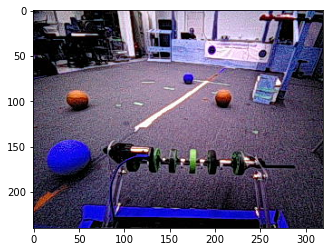

In [17]:
img = cv2.imread(files[0])   # Read the image as BGR
plt.imshow(img)   # Ploting the image using matplotlib

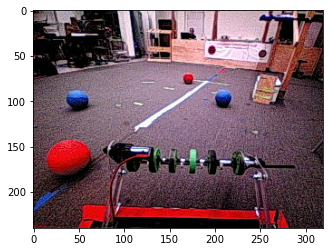

In [18]:
# convert to RGB color convention 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### RGB components

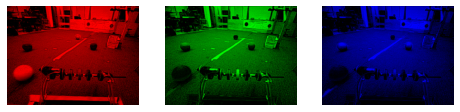

In [19]:
# look at the individual components in RGB space
fix, axs = plt.subplots(ncols=3, nrows=1, figsize=(8,3))
for ix, ax in enumerate(axs):
    temp = np.zeros(img_rgb.shape, dtype='uint8')
    temp[:,:,ix] = img_rgb[:,:,ix]
    ax.imshow(temp)
    ax.set_axis_off()
plt.show()

### HSV components  - note H goes to 180

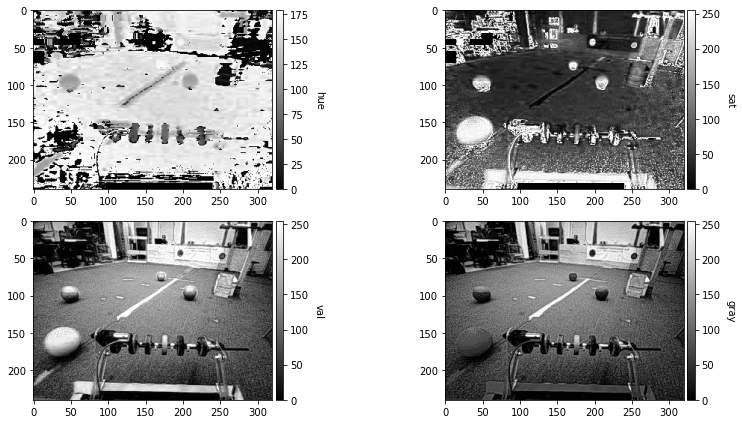

In [20]:
# look at them in HSV space
# look at the individual components in RGB space
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
divider = [None, None, None, None]
cax = [None, None, None, None]
cbar_legend = ['hue', 'sat', 'val', 'gray']
cmap = 'gray'
for ix, ax in (enumerate(axs.flatten()[0:3])):
    temp = np.zeros(img_hsv.shape[0:2], dtype='uint8')
    temp[:,:] = img_hsv[:,:,ix]
    im = ax.imshow(temp, cmap=cmap)
    divider[ix] = make_axes_locatable(ax)
    cax[ix] = divider[ix].append_axes("right", size="3%", pad=0.05)
    cb = plt.colorbar(im, cax=cax[ix])
    cb.ax.set_ylabel(cbar_legend[ix], rotation=270, labelpad=15)
    ax.imshow(temp, cmap=cmap)

ix=3
ax = axs[1,1]
temp = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
im = ax.imshow(temp, cmap=cmap)
divider[ix] = make_axes_locatable(ax)
cax[ix] = divider[ix].append_axes("right", size="3%", pad=0.05)
cb = plt.colorbar(im, cax=cax[ix])
cb.ax.set_ylabel(cbar_legend[ix], rotation=270, labelpad=15)
ax.imshow(temp, cmap=cmap)
    
fig.tight_layout()

### start experimenting with circles

In [21]:
files

['images_15\\test_001.png',
 'images_15\\test_002.png',
 'images_15\\test_003.png',
 'images_15\\test_004.png',
 'images_15\\test_005.png',
 'images_15\\test_006.png',
 'images_15\\test_007.png',
 'images_15\\test_008.png',
 'images_15\\test_009.png',
 'images_15\\test_010.png',
 'images_15\\test_011.png',
 'images_15\\test_012.png',
 'images_15\\test_013.png',
 'images_15\\test_014.png',
 'images_15\\test_015.png',
 'images_15\\test_016.png',
 'images_15\\test_017.png',
 'images_15\\test_018.png']

In [22]:
imgs = []
for file in files:
    img_rgb = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    mask = np.logical_and(img_rgb[:,:,0] > 200, img_rgb[:,:,1] > 200,  img_rgb[:,:,2] > 200)
    img_rgb[mask] = [127,127,127]
    
    imgs.append(img_rgb)

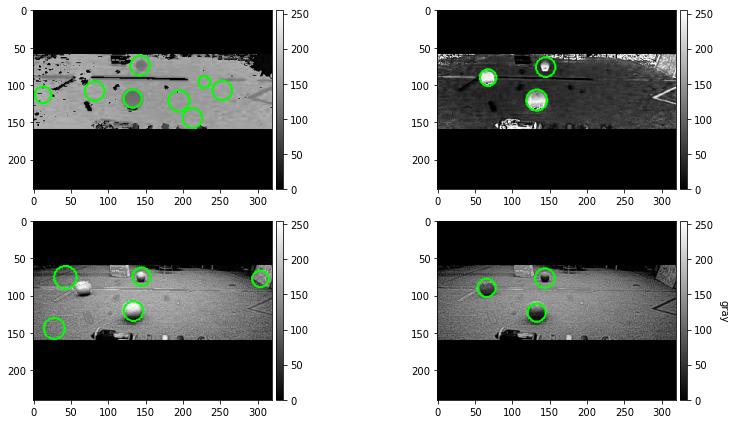

In [145]:
n = 16
img_rgb = imgs[n]
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
[h, s, v] = [img_hsv[:,:,ix] for ix in range(3)]
top, bot = 60, 160
arrays = [h, s, v, gray]
image_circles = {}
for a in arrays:
    a[:top,:] = 0
    a[bot:,:] = 0    
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,6))
divider = [None, None, None, None]; cax = [None, None, None, None]
cbar_legend = ['hue', 'sat', 'val', 'gray']; cmap = 'gray'
for ix, ax in (enumerate(axs.flatten())):
    #im = ax.imshow(arrays[ix], cmap=cmap)
    divider[ix] = make_axes_locatable(ax)
    cax[ix] = divider[ix].append_axes("right", size="3%", pad=0.05)
    cb = plt.colorbar(im, cax=cax[ix])
    cb.ax.set_ylabel(cbar_legend[ix], rotation=270, labelpad=15)
    
    cimg = cv2.cvtColor(arrays[ix], cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(arrays[ix], cv2.HOUGH_GRADIENT_ALT, 1, minDist=20, param1=1, param2=0.2, minRadius=3, maxRadius=20)
    if ix > 0:
        image_circles.update({ix:circles[0, :]})
    if circles is not None:
        for i in circles[0, :]:
            #Draw outer circle (blue)
            cv2.circle(cimg, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
            #Draw Center (red)
            #cv2.circle(cimg, (int(i[0]), int(i[1])), 2, (255, 255, 0), 3)
    ax.imshow(cimg, cmap=cmap)
fig.tight_layout()    

In [146]:
def circle_overlap(c1, c2, thresh=5):
    dist =  ((c1[0]-c2[0])**2 + (c1[1]-c2[1])**2) **0.5
    return dist < thresh

In [147]:
image_circles

{1: array([[145.      ,  77.      ,  13.259444],
        [133.      , 121.      ,  14.097079],
        [ 68.      ,  91.      ,  11.910512]], dtype=float32),
 2: array([[134.      , 121.      ,  13.035601],
        [145.      ,  75.      ,  12.150694],
        [ 28.      , 144.      ,  14.820181],
        [ 43.      ,  76.      ,  15.385301],
        [304.      ,  78.      ,  11.607397]], dtype=float32),
 3: array([[144.      ,  77.      ,  13.597795],
        [133.      , 123.      ,  12.362528],
        [ 66.      ,  90.      ,  12.262974]], dtype=float32)}

In [148]:
# make a list of all centers where the votes are 2 or more
matches = []
for key_1 in image_circles:
    for key_2 in image_circles:
        if key_1 < key_2:
            for ix, c1 in enumerate(image_circles[key_1]):
                for iy, c2 in enumerate(image_circles[key_2]):
                    #print(f'{key_1},{key_2}: {c1} {c2} {circle_overlap(c1,c2)}')
                    if circle_overlap(c1, c2):
                        smaller = c1 if c1[2] < c2[2] else c2
                        matches.append([key_1, ix, key_2, iy, smaller])
matches = sorted(matches, key=lambda x: (x[4][0], x[4][2]))
matches

[[1, 2, 3, 2, array([68.      , 91.      , 11.910512], dtype=float32)],
 [1, 1, 3, 1, array([133.      , 123.      ,  12.362528], dtype=float32)],
 [2, 0, 3, 1, array([133.      , 123.      ,  12.362528], dtype=float32)],
 [1, 1, 2, 0, array([134.      , 121.      ,  13.035601], dtype=float32)],
 [1, 0, 2, 1, array([145.      ,  75.      ,  12.150694], dtype=float32)],
 [2, 1, 3, 0, array([145.      ,  75.      ,  12.150694], dtype=float32)],
 [1, 0, 3, 0, array([145.      ,  77.      ,  13.259444], dtype=float32)]]

In [151]:
# man this is ugly - must be a standard approach for this
best_matches = []
count = 1
for ix, match in enumerate(matches[:-1]):

    if circle_overlap(matches[ix][4], matches[ix+1][4]):
        count += 1
        if ix+2 == len(matches):
            best_matches.append([count, matches[ix]])
    else:
        best_matches.append([count, matches[ix]])
        count = 1
best_matches

[[1, [1, 2, 3, 2, array([68.      , 91.      , 11.910512], dtype=float32)]],
 [3, [1, 1, 2, 0, array([134.      , 121.      ,  13.035601], dtype=float32)]],
 [3, [2, 1, 3, 0, array([145.      ,  75.      ,  12.150694], dtype=float32)]]]

(240, 320)


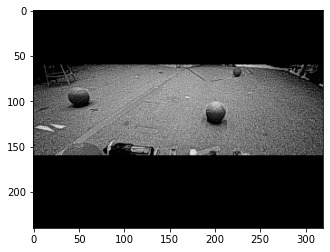

In [24]:
# convert to grey and crop
top, bot = 60, 160
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
gray[:top,:] = 0
gray[bot:,:] = 0
print(gray.shape)
plt.imshow(gray, cmap='gray')

In [25]:
circles = cv2.HoughCircles(v, cv2.HOUGH_GRADIENT, 1, 20,
                     param1=50, param2=40, minRadius=10, maxRadius=50)
circles

array([[[170.5, 109.5,  47.2],
        [126.5, 109.5,  42.7],
        [249.5, 110.5,  42.7],
        [206.5, 102.5,  42.7],
        [269.5, 118.5,  42.7],
        [ 38.5, 101.5,  35. ],
        [277.5,  99.5,  33.8],
        [210.5, 124.5,  33.8],
        [ 67.5, 125.5,  33.8],
        [166.5, 129.5,  29.4],
        [147.5, 116.5,  29.4],
        [ 60.5, 105.5,  27.2],
        [291.5, 114.5,  23.9],
        [106.5, 105.5,  19.4],
        [224.5,  87.5,  21.6],
        [ 85.5, 107.5,  21.7],
        [142.5,  95.5,  21.7],
        [190.5, 114.5,  19.4],
        [190.5,  87.5,  17.2],
        [138.5, 135.5,  17.2],
        [226.5, 108.5,  17.2],
        [ 41.5, 123.5,  13.8]]], dtype=float32)

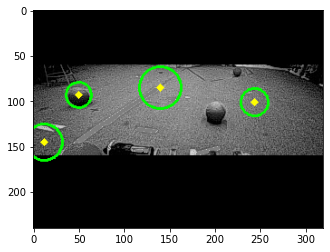

In [26]:
cimg = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT, 1, minDist=10,
                           param1=2, param2=0.2, minRadius=3, maxRadius=30)
for i in circles[0, :]:
    #Draw outer circle (blue)
    cv2.circle(cimg, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)

    #Draw Center (red)
    cv2.circle(cimg, (int(i[0]), int(i[1])), 2, (255, 255, 0), 3)
plt.imshow(cimg)

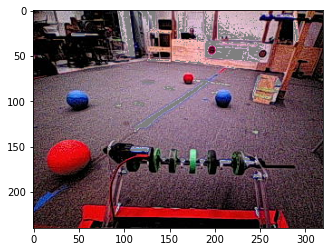

In [9]:
mask = np.logical_and(img_rgb[:,:,0] > 200, img_rgb[:,:,1] > 200,  img_rgb[:,:,2] > 200)
img_rgb[mask] = [127,127,127]
plt.imshow(img_rgb)

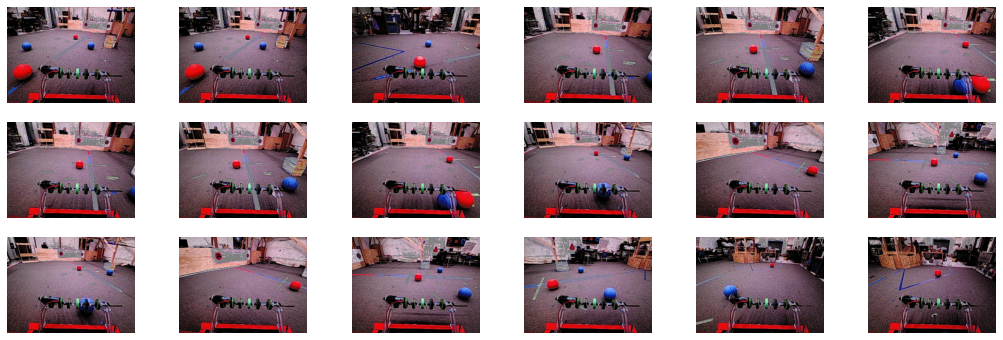

In [101]:
imgs = []
for file in files:
    img_rgb = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    mask = np.logical_and(img_rgb[:,:,0] > 200, img_rgb[:,:,1] > 200,  img_rgb[:,:,2] > 200)
    img_rgb[mask] = [127,127,127]
    
    imgs.append(img_rgb)
    
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(18,6))
for ix, row in enumerate(axs):
    for iy, ax in enumerate(row):
        ax.imshow(imgs[3*ix + iy])
        ax.set_axis_off()
        
plt.show()

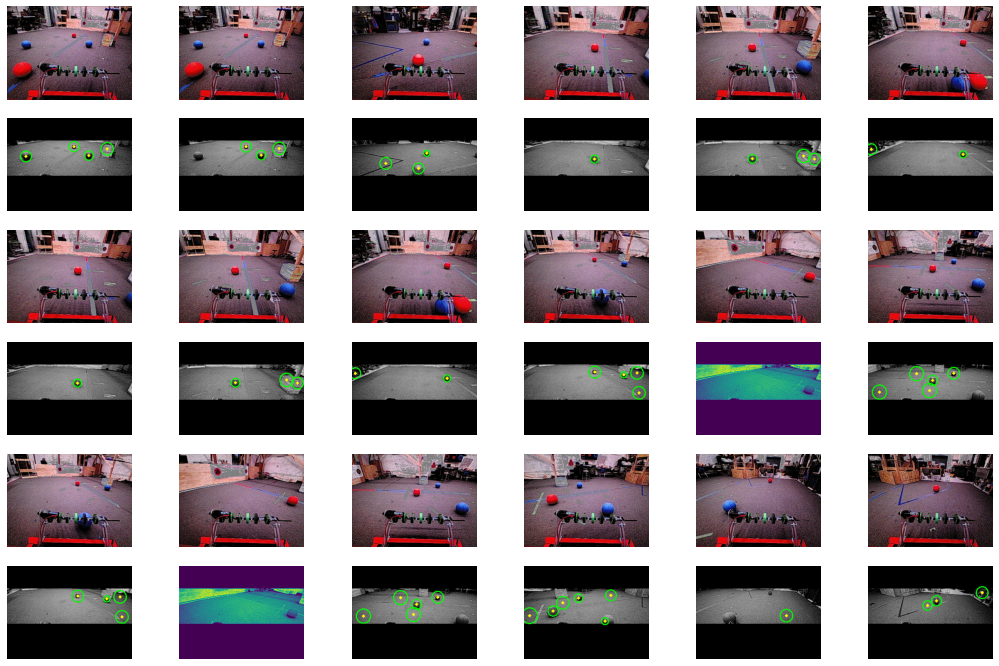

Wall time: 1.13 s


In [11]:
%%time
cimgs = []
for img in imgs: 
    top, bot = 60, 150
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray[:top,:] = 0; gray[bot:,:] = 0
    cimg = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT, 1, minDist=20,
                           param1=10, param2=0.15, minRadius=4, maxRadius=25)
    # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, minDist=20,
    #                        param1=5, param2=20, minRadius=5, maxRadius=30)
    if circles is not None:
        for i in circles[0, :]:
            #Draw outer circle (blue)
            cv2.circle(cimg, (int(i[0]), int(i[1])), int(i[2]), (0, 255, 0), 2)
            #Draw Center (red)
            cv2.circle(cimg, (int(i[0]), int(i[1])), 2, (255, 255, 0), 3)
        cimgs.append(cimg)
    else:
        cimgs.append(gray)
    
fig, axs = plt.subplots(ncols=6, nrows=6, figsize=(18,12))
for ix, row in enumerate(axs):
    for iy, ax in enumerate(row):
        if ix % 2 == 0:
            ax.imshow(imgs[3*(ix//2) + iy])
        else:
            ax.imshow(cimgs[3*(ix-1)//2 + iy])
        ax.set_axis_off()
plt.show()

### quick examination of the image - looking for blues (easy because HUE is ~107 )

In [28]:
height, width, _ = img_rgb.shape

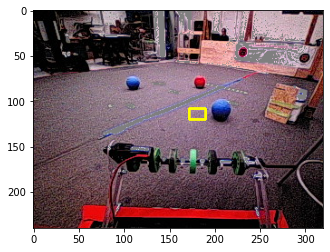

In [29]:
# cv has the origin at top left, and goes over in (x, y)
top_left_x = 172
top_left_y = 108  # x,y of the top left of the rectangle we want
width = 18
height = 12


rectangle_img = img_rgb.copy()
cv2.rectangle(rectangle_img, (top_left_x, top_left_y), (top_left_x+width, top_left_y+height), (255, 255, 0), 2)  # Rectangles: image, top left, bot right, color, thickness
plt.imshow(rectangle_img)

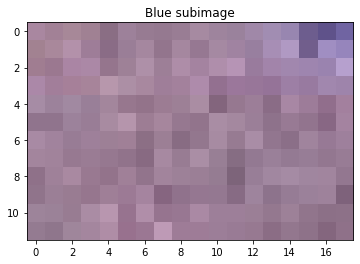

In [30]:
# numpy is not cv - origin is at the top left BUT it goes over in (y, x) 
sub_image_rgb = img_rgb[top_left_y:top_left_y+height, top_left_x:top_left_x+width,:]
sub_image_hsv =  img_hsv[top_left_y:top_left_y+height, top_left_x:top_left_x+width,:]
plt.title('Blue subimage')
plt.imshow(sub_image_rgb);


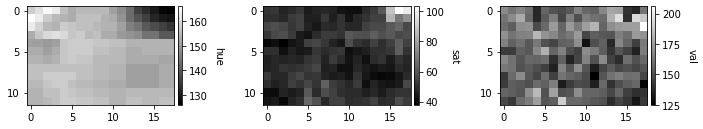

In [31]:
img_hsv = cv2.cvtColor(sub_image_rgb, cv2.COLOR_RGB2HSV)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10,4))
divider = [None, None, None]
cax = [None, None, None]
cbar_legend = ['hue', 'sat', 'val']
cmap = 'gray'
for ix, ax in enumerate(axs):
    temp = np.zeros(img_hsv.shape[0:2], dtype='uint8')
    temp[:,:] = img_hsv[:,:,ix]
    im = ax.imshow(temp, cmap=cmap)
    divider[ix] = make_axes_locatable(ax)
    cax[ix] = divider[ix].append_axes("right", size="3%", pad=0.05)
    cb = plt.colorbar(im, cax=cax[ix])
    cb.ax.set_ylabel(cbar_legend[ix], rotation=270, labelpad=15)
    ax.imshow(temp, cmap=cmap)
fig.tight_layout()


In [32]:
def analyze_data(img):
    results = {'AVG_RED':img[:,:,0].mean().round(2),
            'AVG_GREEN':img[:,:,1].mean().round(2),
            'AVG_BLUE':img[:,:,2].mean().round(2),
            'AVG_HUE':img[:,:,0].mean().round(2),
            'AVG_SAT':img[:,:,1].mean().round(2),
            'AVG_VAL':img[:,:,2].mean().round(2),
            'MAX_HUE':float(np.max(img[:,:,0])),
            'MIN_HUE':float(np.min(img[:,:,0])),
            'MAX_SAT':float(np.max(img[:,:,1])),
            'MIN_SAT':float(np.min(img[:,:,1])),
            'MAX_VAL':float(np.max(img[:,:,2])),
            'MIN_VAL':float(np.min(img[:,:,2]))}
    df = pd.DataFrame([results])
    pd.set_option("display.precision", 2)
    display(df)
    return results

In [33]:
training_data = analyze_data(sub_image_hsv)

,AVG_RED,AVG_GREEN,AVG_BLUE,AVG_HUE,AVG_SAT,AVG_VAL,MAX_HUE,MIN_HUE,MAX_SAT,MIN_SAT,MAX_VAL,MIN_VAL
0,153.15,50.91,157.19,153.15,50.91,157.19,166.0,126.0,103.0,38.0,206.0,125.0


In [34]:
def histogram_plot(data, save=False, title=''):
    # make a dataframe from the sub-image and add a cumulative density function (CDF)
    df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1],3), columns=['HUE', 'SAT', 'VAL'])
    df['hue_cdf'] = df.rank(method='average', pct=True)['HUE']
    df['sat_cdf'] = df.rank(method='average', pct=True)['SAT'] 
    df['val_cdf'] = df.rank(method='average', pct=True)['VAL'] 
    
    # set up a plot
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))

    # three histograms - could do all this with a for loop but I'll be explicit for the students 
    ax1 = df.hist(column='HUE', bins=20, weights=np.ones(len(df)) / len(df), figsize = (10,6), ax=ax, color='purple', alpha=0.6)
    ax2 = df.hist(column='SAT', bins=20, weights=np.ones(len(df)) / len(df), figsize = (10,6), ax=ax, color='orange', alpha=0.6)
    ax3 = df.hist(column='VAL', bins=20, weights=np.ones(len(df)) / len(df), figsize = (10,6), ax=ax, color='cyan', alpha=0.6)
    # three cdfs
    ax4 = df.sort_values('HUE').plot(x ='HUE', y = 'hue_cdf', lw=3, style='--', ax=ax, fontsize=20, color='purple', alpha=0.6)
    ax4 = df.sort_values('SAT').plot(x ='SAT', y = 'sat_cdf', lw=3, style='--', ax=ax, fontsize=20, color='orange', alpha=0.6)
    ax4 = df.sort_values('VAL').plot(x ='VAL', y = 'val_cdf', lw=3, style='--', grid = True, ax=ax, fontsize=20, color='cyan', alpha=0.6)
    # annotate the plot
    plt.legend(loc=(0.95,0.5), prop={'size': 14})
    plt.title(f'{title} HSV Histogram, n={len(df)}', fontsize=16)
    plt.xlabel(f'Value of H, S, or V', fontsize=18)
    if save:
        plt.savefig('training_histogram.png', facecolor='w')
    plt.show()

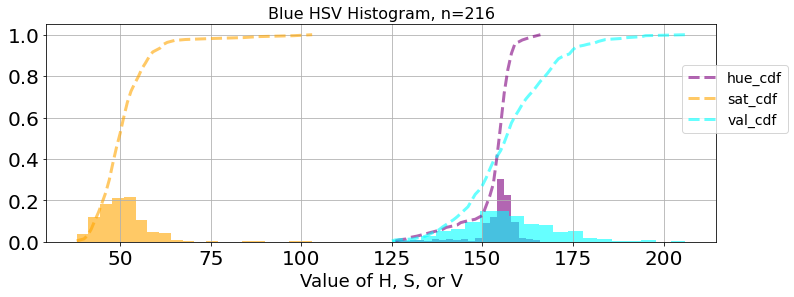

In [35]:
histogram_plot(sub_image_hsv, title='Blue', save=False)

#### see how it worked - not much guesswork anymore...

In [36]:
def hsv_threshold(input, hue, sat, val):
    """Segment an image based on hue, saturation, and value ranges.
    Args:
        input: A BGR numpy.ndarray.
        hue: A list of two numbers the are the min and max hue.
        sat: A list of two numbers the are the min and max saturation.
        lum: A list of two numbers the are the min and max value.
    Returns:
        A black and white numpy.ndarray.
    """
    out = cv2.cvtColor(input, cv2.COLOR_RGB2HSV)
    return cv2.inRange(out, (hue[0], sat[0], val[0]), (hue[1], sat[1], val[1]))

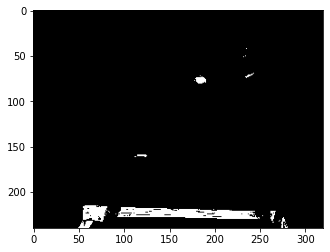

In [37]:
h = [165,180]
h2 =  [0, 0]
s = [120,255]
v = [180,255]
hsv_thresh_image = hsv_threshold(img_rgb.copy(), h, s, v) + hsv_threshold(img_rgb.copy(), h2, s, v)
plt.imshow(hsv_thresh_image, cmap='gray')

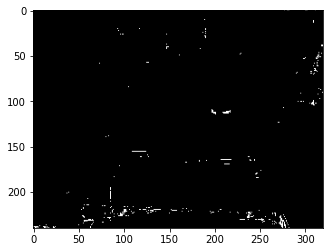

In [38]:
h = [120,150]
s = [150,255]
v = [50,200]
hsv_thresh_image = hsv_threshold(img_rgb.copy(), h, s, v) + hsv_threshold(img_rgb.copy(), h2, s, v)
plt.imshow(hsv_thresh_image, cmap='gray')

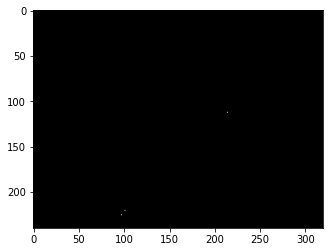

In [39]:
eroded = cv2.erode(hsv_thresh_image, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=1) 
plt.imshow(eroded, cmap='gray')

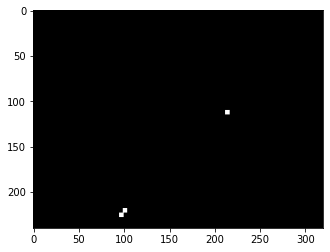

In [40]:
dilated = cv2.dilate(eroded, cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)), iterations=2) 
plt.imshow(dilated, cmap='gray')

### what works at OC???

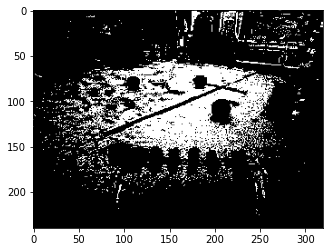

In [41]:
hue_tolerance = 5
h = [training_data['MIN_HUE'] - hue_tolerance, training_data['MAX_HUE'] + hue_tolerance]
s = [training_data['MIN_SAT'], training_data['MAX_SAT']]
v = [training_data['MIN_VAL'], training_data['MAX_VAL']]
hsv_thresh_image = hsv_threshold(img_rgb.copy(), h, s, v)
plt.imshow(hsv_thresh_image, cmap='gray')

### fix the problems with red - it wraps around 180, so it makes life harder
* can just do two cv.inRange() calls, but that's several if statements
* or you can invert the image (color negative) and look for cyan (hue ~ 90)

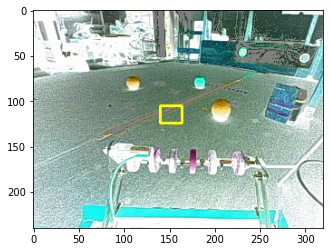

In [42]:
# invert an image - red becomes cyan
top_left_x = 140
top_left_y = 105  # x,y of the top left of the rectangle we want
width = 24
height = 19

rectangle_img = ~img_rgb.copy()
cv2.rectangle(rectangle_img, (top_left_x, top_left_y), (top_left_x+width, top_left_y+height), (255, 255, 0), 2)  # Rectangles: image, top left, bot right, color, thickness
plt.imshow(rectangle_img)

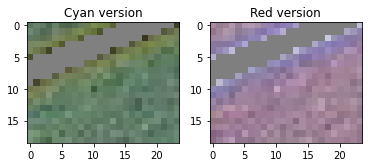

In [43]:
# numpy is not cv - origin is at the top left BUT it goes over in (y, x) 
sub_image_rgb = img_rgb[top_left_y:top_left_y+height, top_left_x:top_left_x+width,:]
sub_image_not_rgb = ~img_rgb[top_left_y:top_left_y+height, top_left_x:top_left_x+width,:]
sub_image_not_hsv = cv2.cvtColor(sub_image_not_rgb, cv2.COLOR_RGB2HSV)
sub_image_hsv = cv2.cvtColor(sub_image_rgb, cv2.COLOR_RGB2HSV)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Cyan version')
ax1.imshow(sub_image_not_rgb)
ax2.set_title('Red version')
ax2.imshow(sub_image_rgb)

In [44]:
training_data_cyan = analyze_data(sub_image_not_hsv)

,AVG_RED,AVG_GREEN,AVG_BLUE,AVG_HUE,AVG_SAT,AVG_VAL,MAX_HUE,MIN_HUE,MAX_SAT,MIN_SAT,MAX_VAL,MIN_VAL
0,48.72,56.3,124.96,48.72,56.3,124.96,86.0,0.0,132.0,0.0,159.0,56.0


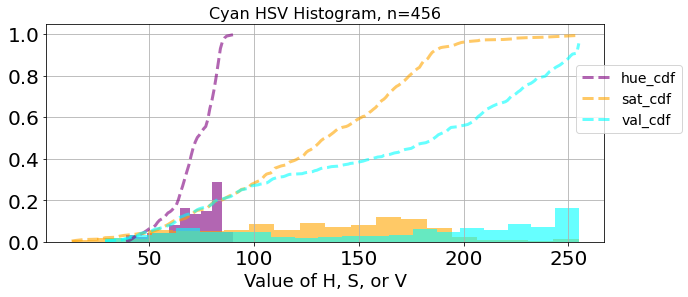

In [84]:
histogram_plot(sub_image_not_hsv, title='Cyan', save=False)

In [85]:
training_data_red = analyze_data(sub_image_hsv)

,AVG_RED,AVG_GREEN,AVG_BLUE,AVG_HUE,AVG_SAT,AVG_VAL,MAX_HUE,MIN_HUE,MAX_SAT,MIN_SAT,MAX_VAL,MIN_VAL
0,160.21,139.48,169.52,160.21,139.48,169.52,177.0,0.0,255.0,22.0,255.0,13.0


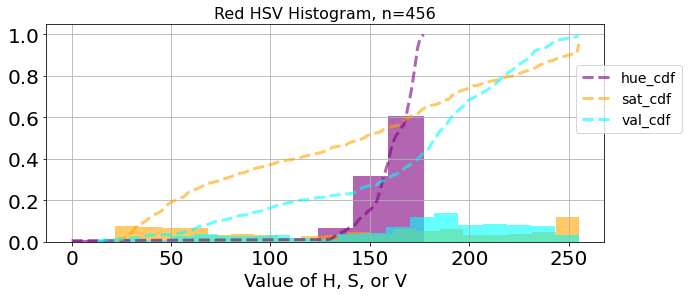

In [86]:
histogram_plot(sub_image_hsv, title='Red', save=False)

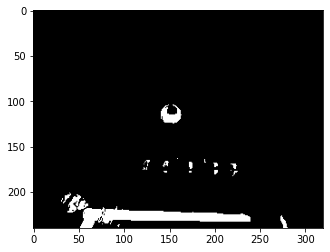

In [120]:
h = [150,180]
h2 = h1
s = [50,255]
v = [120,254]
hsv_thresh_image = hsv_threshold(img_rgb.copy(), h, s, v) + hsv_threshold(img_rgb.copy(), h2, s, v)
plt.imshow(hsv_thresh_image, cmap='gray')

#### if cyan is impractical, just use an OR statement in your HSV threshold

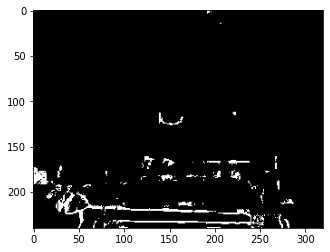

In [41]:
h1 = 0, 10
h2 = 170, 180
s = [training_data_red['MIN_SAT'], training_data_red['MAX_SAT']]
v = [training_data_red['MIN_VAL'], training_data_red['MAX_VAL']]
hsv_thresh_image = hsv_threshold(img_rgb.copy(), h1, s, v) | hsv_threshold(img_rgb.copy(), h2, s, v)
plt.imshow(hsv_thresh_image, cmap='gray')